# Check similarity matrices

In [6]:
import os

In [7]:
data_dir = '/project/3013104.01/analysis'
os.chdir(data_dir)

## Plot histograms of the SPSQ distance matrices

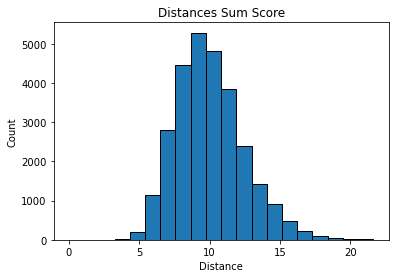

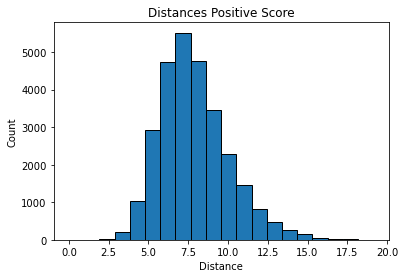

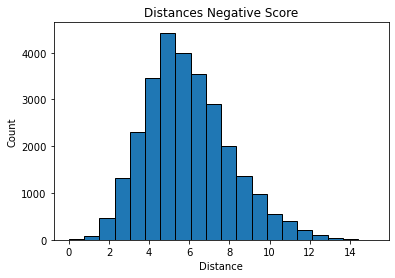

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the similarity matrices from CSV files
file1 = 'similarity_matrices_spsq/SPSQ-24_all/distance_matrix_sum_score.csv'
file2 = 'similarity_matrices_spsq/SPSQ-24_all/distance_matrix_positive_score.csv'
file3 = 'similarity_matrices_spsq/SPSQ-24_all/distance_matrix_negative_score.csv'

matrix1 = pd.read_csv(file1, header=0, index_col=0).values
matrix2 = pd.read_csv(file2, header=0, index_col=0).values
matrix3 = pd.read_csv(file3, header=0, index_col=0).values

# Function to plot the lower triangle of a matrix as a histogram
def plot_lower_triangle_histogram(matrix, title):
    # Create a mask to select the lower triangle (excluding the diagonal)
    mask = np.tri(matrix.shape[0], k=-1)

    # Flatten the lower triangle values into a 1D array
    lower_triangle_values = matrix[mask == 1]

    # Create a histogram
    plt.hist(lower_triangle_values, bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel('Distance')
    plt.ylabel('Count')
    plt.show()

# Plot histograms for each matrix
plot_lower_triangle_histogram(matrix1, 'Distances Sum Score')
plot_lower_triangle_histogram(matrix2, 'Distances Positive Score')
plot_lower_triangle_histogram(matrix3, 'Distances Negative Score')

## Plot histograms of the similarity matrices

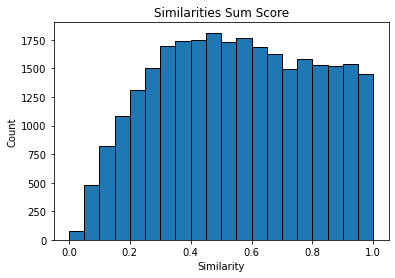

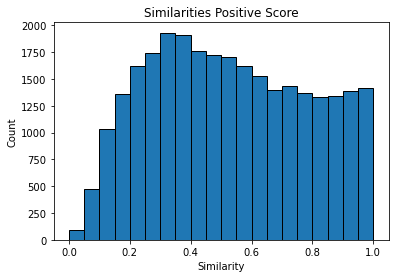

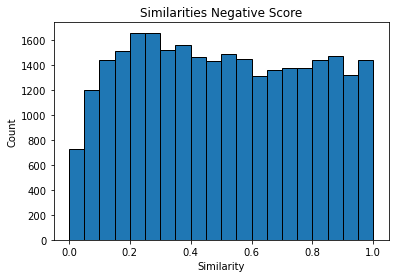

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the similarity matrices from CSV files
file1 = 'similarity_matrices_spsq/SPSQ-24_all/similarity_matrix_sum_score.csv'
file2 = 'similarity_matrices_spsq/SPSQ-24_all/similarity_matrix_positive_score.csv'
file3 = 'similarity_matrices_spsq/SPSQ-24_all/similarity_matrix_negative_score.csv'

matrix1 = pd.read_csv(file1, header=0, index_col=0)
matrix2 = pd.read_csv(file2, header=0, index_col=0)
matrix3 = pd.read_csv(file3, header=0, index_col=0)

# Function to plot the lower triangle of a matrix as a histogram
def plot_lower_triangle_histogram(matrix, title):
    # Create a mask to select the lower triangle (excluding the diagonal)
    mask = np.tri(matrix.shape[0], k=-1)

    # Flatten the lower triangle values into a 1D array
    lower_triangle_values = matrix.values[mask == 1]

    # Create a histogram
    plt.hist(lower_triangle_values, bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel('Similarity')
    plt.ylabel('Count')
    plt.show()

# Function to find and print unique similarity scores greater than a threshold (ignores diagonal)
def find_unique_similarities_above_threshold(matrix, threshold, row_labels, col_labels):
    # Create a mask to exclude diagonal values
    np.fill_diagonal(matrix.values, 0)
    
    above_threshold_indices = np.where(matrix.values > threshold)
    
    unique_edges = set()
    
    print(f'Unique similarity scores above {threshold} (ignoring diagonal):')
    for i in range(len(above_threshold_indices[0])):
        row_idx = above_threshold_indices[0][i]
        col_idx = above_threshold_indices[1][i]
        value = matrix.iloc[row_idx, col_idx]
        
        # Ensure that the edge is unique before printing
        if (row_labels[row_idx], col_labels[col_idx]) not in unique_edges and (col_labels[col_idx], row_labels[row_idx]) not in unique_edges:
            print(f'({row_labels[row_idx]}, {col_labels[col_idx]}): {value}')
            unique_edges.add((row_labels[row_idx], col_labels[col_idx]))

# Assuming you have row and column labels as lists (replace with your actual labels)
row_labels_matrix1 = matrix1.index.tolist()
col_labels_matrix1 = matrix1.columns.tolist()

row_labels_matrix2 = matrix2.index.tolist()
col_labels_matrix2 = matrix2.columns.tolist()

row_labels_matrix3 = matrix3.index.tolist()
col_labels_matrix3 = matrix3.columns.tolist()

# Plot histograms for each matrix
plot_lower_triangle_histogram(matrix1, 'Similarities Sum Score')
plot_lower_triangle_histogram(matrix2, 'Similarities Positive Score')
plot_lower_triangle_histogram(matrix3, 'Similarities Negative Score')

#print('Subject pairs with high similarity')
#find_unique_similarities_above_threshold(matrix1, 0.3, row_labels_matrix1, col_labels_matrix1)
#find_unique_similarities_above_threshold(matrix2, 0.4, row_labels_matrix2, col_labels_matrix2)
#find_unique_similarities_above_threshold(matrix3, 0.6, row_labels_matrix3, col_labels_matrix3)


## Plot heatmaps of the distance matrices

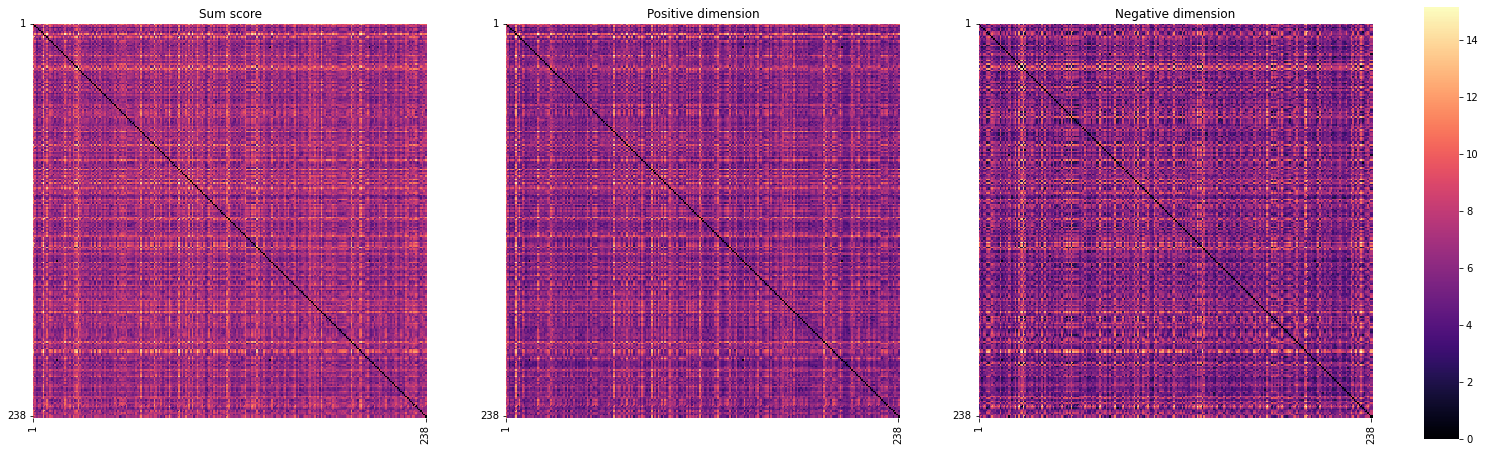

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read three different matrix files with header row and no row label column
file1 = 'similarity_matrices_spsq/SPSQ-24_all/distance_matrix_sum_score.csv'
file2 = 'similarity_matrices_spsq/SPSQ-24_all/distance_matrix_positive_score.csv'
file3 = 'similarity_matrices_spsq/SPSQ-24_all/distance_matrix_negative_score.csv'

# Read CSV files
distance_matrix_df1 = pd.read_csv(file1, header=0, index_col=0)
distance_matrix_df2 = pd.read_csv(file2, header=0, index_col=0)
distance_matrix_df3 = pd.read_csv(file3, header=0, index_col=0)

# Define the minimum and maximum values
min_value = 1
max_value = 238

# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(24, 12))

# Create a heatmap for sum score
sns.heatmap(distance_matrix_df1, ax=axes[0], annot=False, cmap='magma', cbar=False, square=True, linewidths=0, vmin=distance_matrix_df1.values.min(), vmax=distance_matrix_df1.values.max())
axes[0].set_xticks([0, len(distance_matrix_df1.columns) - 1])
axes[0].set_yticks([0, len(distance_matrix_df1) - 1])
axes[0].set_xticklabels([min_value, max_value])
axes[0].set_yticklabels([min_value, max_value])
axes[0].set_title('Sum score')
axes[0].set_ylabel('')

# Create a heatmap for the positive dimension
sns.heatmap(distance_matrix_df2, ax=axes[1], annot=False, cmap='magma', cbar=False, square=True, linewidths=0, vmin=distance_matrix_df2.values.min(), vmax=distance_matrix_df2.values.max())
axes[1].set_xticks([0, len(distance_matrix_df2.columns) - 1])
axes[1].set_yticks([0, len(distance_matrix_df2) - 1])
axes[1].set_xticklabels([min_value, max_value])
axes[1].set_yticklabels([min_value, max_value])
axes[1].set_title('Positive dimension')
axes[1].set_ylabel('')  

# Create a heatmap for the negative dimensions
sns.heatmap(distance_matrix_df3, ax=axes[2], annot=False, cmap='magma', cbar_ax=fig.add_axes([0.93, 0.25, 0.02, 0.5]), square=True, linewidths=0, vmin=distance_matrix_df3.values.min(), vmax=distance_matrix_df3.values.max())
axes[2].set_xticks([0, len(distance_matrix_df3.columns) - 1])
axes[2].set_yticks([0, len(distance_matrix_df3) - 1])
axes[2].set_xticklabels([min_value, max_value])
axes[2].set_yticklabels([min_value, max_value])
axes[2].set_title('Negative dimension')
axes[2].set_ylabel('')  

plt.show()

## Plot heatmaps of the similarity matrices

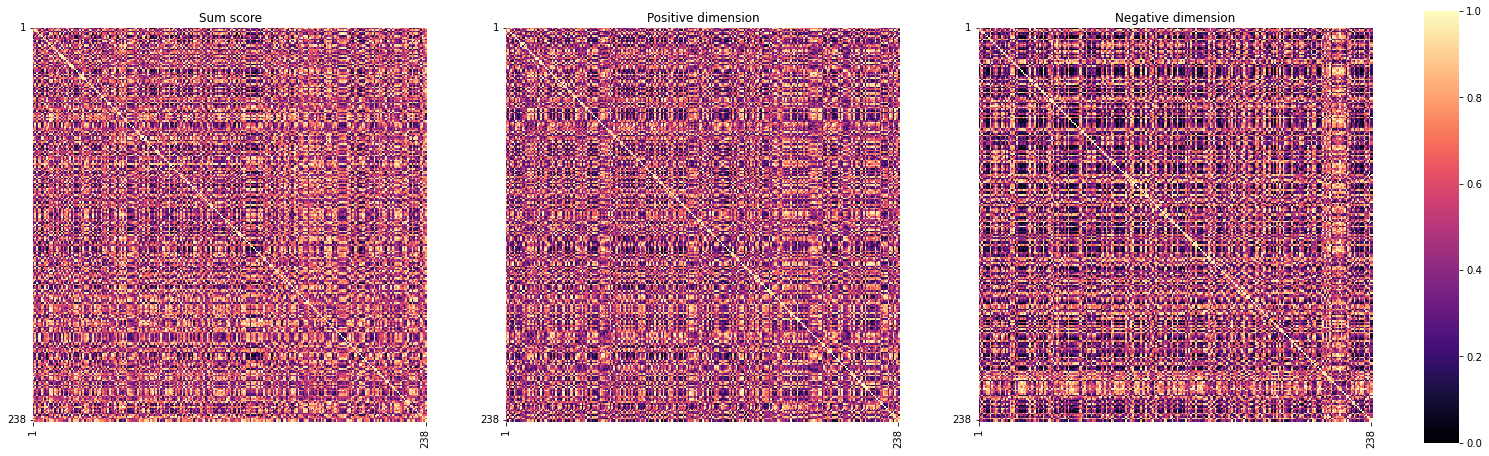

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read three different matrix files with header row and no row label column
file1 = 'similarity_matrices_spsq/SPSQ-24_all/similarity_matrix_sum_score.csv'
file2 = 'similarity_matrices_spsq/SPSQ-24_all/similarity_matrix_positive_score.csv'
file3 = 'similarity_matrices_spsq/SPSQ-24_all/similarity_matrix_negative_score.csv'

# Read CSV files
distance_matrix_df1 = pd.read_csv(file1, header=0, index_col=0)
distance_matrix_df2 = pd.read_csv(file2, header=0, index_col=0)
distance_matrix_df3 = pd.read_csv(file3, header=0, index_col=0)

# Define the minimum and maximum values
min_value = 1
max_value = 238

# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(24, 12))

# Create a heatmap for sum score
sns.heatmap(distance_matrix_df1, ax=axes[0], annot=False, cmap='magma', cbar=False, square=True, linewidths=0, vmin=distance_matrix_df1.values.min(), vmax=distance_matrix_df1.values.max())
axes[0].set_xticks([0, len(distance_matrix_df1.columns) - 1])
axes[0].set_yticks([0, len(distance_matrix_df1) - 1])
axes[0].set_xticklabels([min_value, max_value])
axes[0].set_yticklabels([min_value, max_value])
axes[0].set_title('Sum score')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Create a heatmap for the positive dimension
sns.heatmap(distance_matrix_df2, ax=axes[1], annot=False, cmap='magma', cbar=False, square=True, linewidths=0, vmin=distance_matrix_df2.values.min(), vmax=distance_matrix_df2.values.max())
axes[1].set_xticks([0, len(distance_matrix_df2.columns) - 1])
axes[1].set_yticks([0, len(distance_matrix_df2) - 1])
axes[1].set_xticklabels([min_value, max_value])
axes[1].set_yticklabels([min_value, max_value])
axes[1].set_title('Positive dimension')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Create a heatmap for the negative dimensions
sns.heatmap(distance_matrix_df3, ax=axes[2], annot=False, cmap='magma', cbar_ax=fig.add_axes([0.93, 0.25, 0.02, 0.5]), square=True, linewidths=0, vmin=distance_matrix_df3.values.min(), vmax=distance_matrix_df3.values.max())
axes[2].set_xticks([0, len(distance_matrix_df3.columns) - 1])
axes[2].set_yticks([0, len(distance_matrix_df3) - 1])
axes[2].set_xticklabels([min_value, max_value])
axes[2].set_yticklabels([min_value, max_value])
axes[2].set_title('Negative dimension')
axes[2].set_xlabel('')
axes[2].set_ylabel('')

plt.show()

### Sort the similarity heatmaps

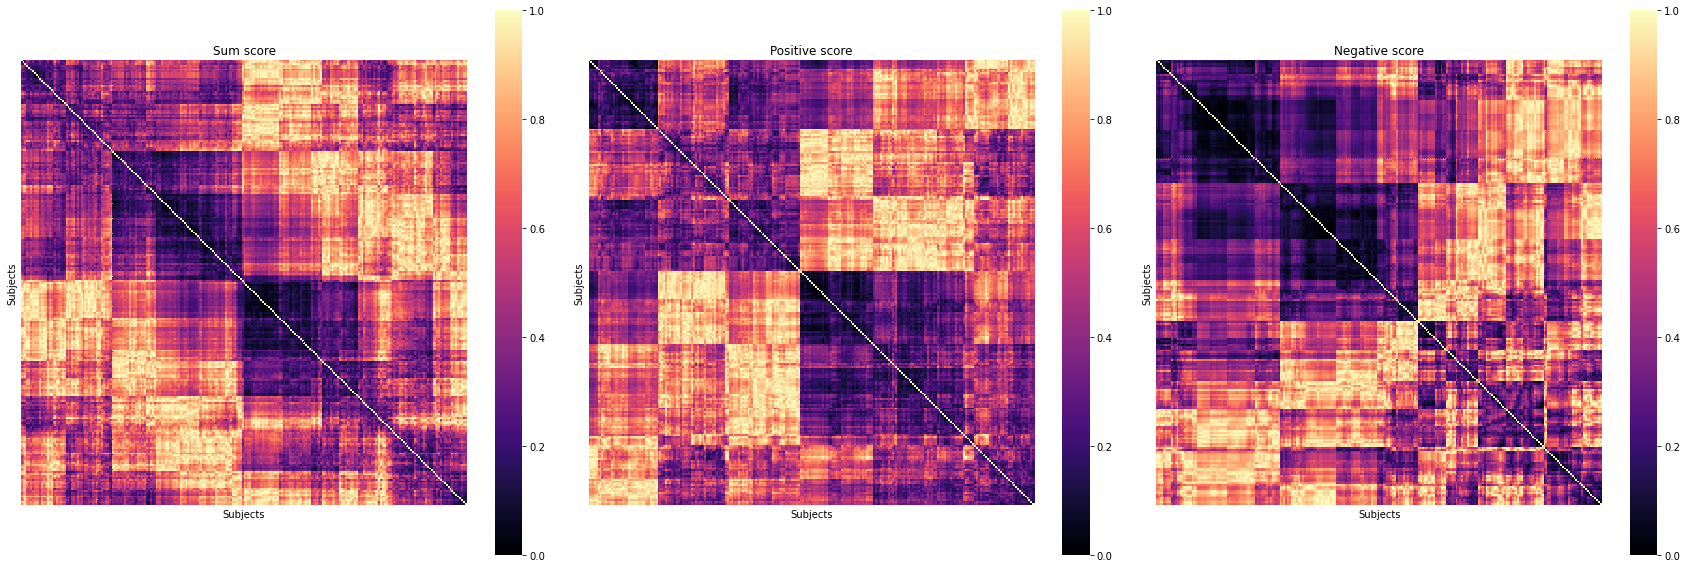

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy

# Function to create a hierarchical clustered heatmap with sorting
def create_hierarchical_heatmap(file_path, sorting_file, ax, title):
    # Read the primary CSV file
    distance_matrix_df = pd.read_csv(file_path, header=0, index_col=0)

    # Read the sorting file containing the sorting column
    sorting_df = pd.read_csv(sorting_file)

    # Sort both the x-axis and y-axis (subjects) based on 'SPSQ_sum' column
    sorted_order = sorting_df.sort_values(by='SPSQ_sum')['subject']
    distance_matrix_df = distance_matrix_df.loc[sorted_order, sorted_order]

    # Calculate hierarchical clustering without plotting dendrograms
    row_order = hierarchy.leaves_list(hierarchy.linkage(distance_matrix_df, method='average'))
    col_order = hierarchy.leaves_list(hierarchy.linkage(distance_matrix_df.T, method='average'))

    # Reorder the data matrix
    data_reordered = distance_matrix_df.iloc[row_order, col_order]

    # Create the heatmap with sorting
    sns.heatmap(data_reordered, ax=ax, annot=False, cmap='magma', cbar=True, square=True, linewidths=0,
                vmin=data_reordered.values.min(), vmax=data_reordered.values.max())

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    ax.set_xlabel('Subjects')
    ax.set_ylabel('Subjects')

# Define the file paths and sorting file for the three files
file1 = 'similarity_matrices_spsq/SPSQ-24_all/similarity_matrix_sum_score.csv'
file2 = 'similarity_matrices_spsq/SPSQ-24_all/similarity_matrix_positive_score.csv'
file3 = 'similarity_matrices_spsq/SPSQ-24_all/similarity_matrix_negative_score.csv'
sorting_file = 'SPSQ-24_all.csv'

# Create subplots for the three heatmaps
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Create hierarchical clustered heatmaps with sorting for the three files
create_hierarchical_heatmap(file1, sorting_file, axes[0], 'Sum score')
create_hierarchical_heatmap(file2, sorting_file, axes[1], 'Positive dimension')
create_hierarchical_heatmap(file3, sorting_file, axes[2], 'Negative dimension')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


## Brain similarity for specific ROIs

/home/posdevpsy/chrgon/.local/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/posdevpsy/chrgon/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/posdevpsy/chrgon/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


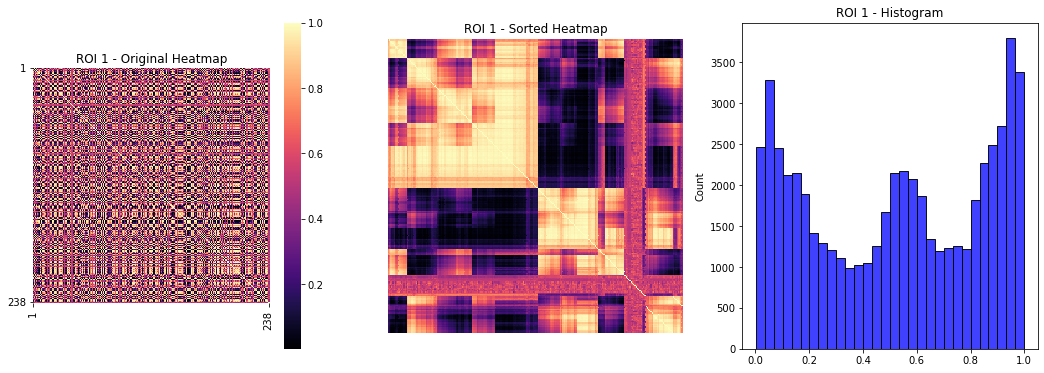

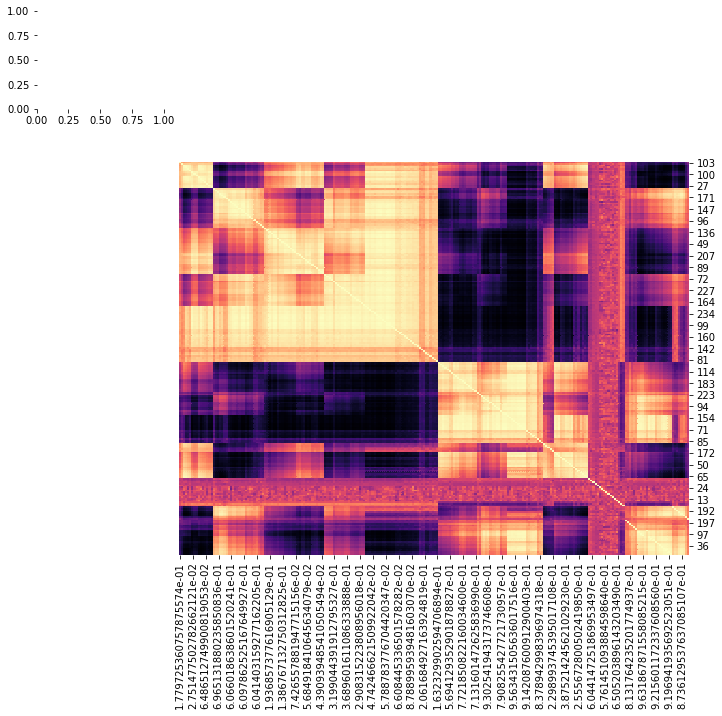

/home/posdevpsy/chrgon/.local/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/posdevpsy/chrgon/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/posdevpsy/chrgon/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


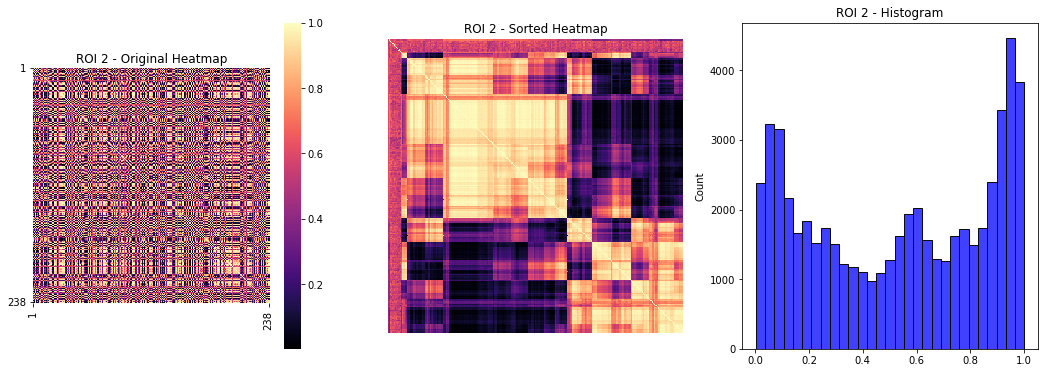

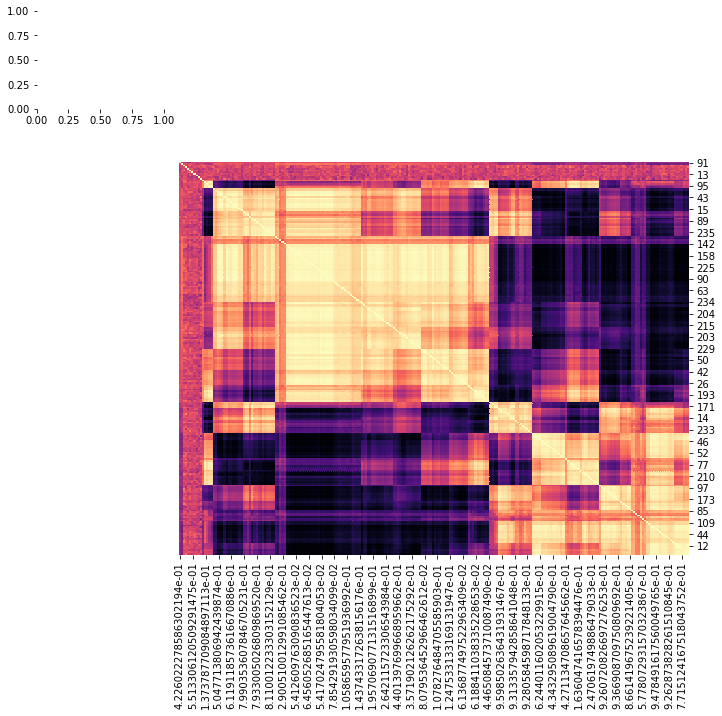

/home/posdevpsy/chrgon/.local/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/posdevpsy/chrgon/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/posdevpsy/chrgon/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


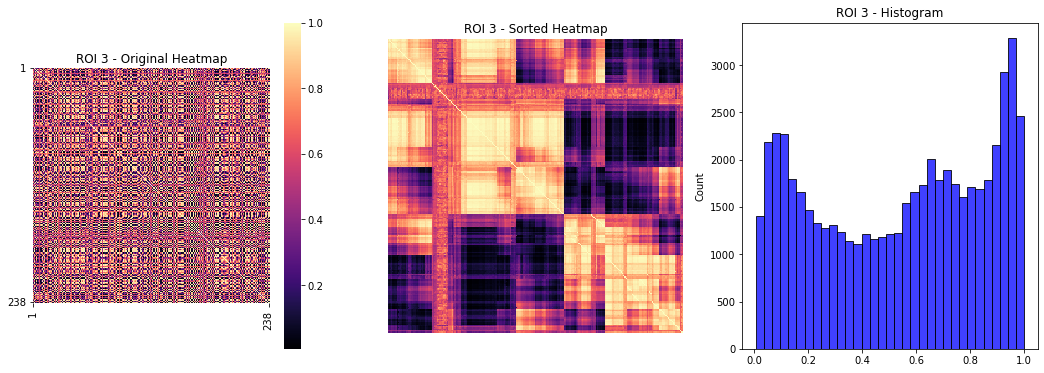

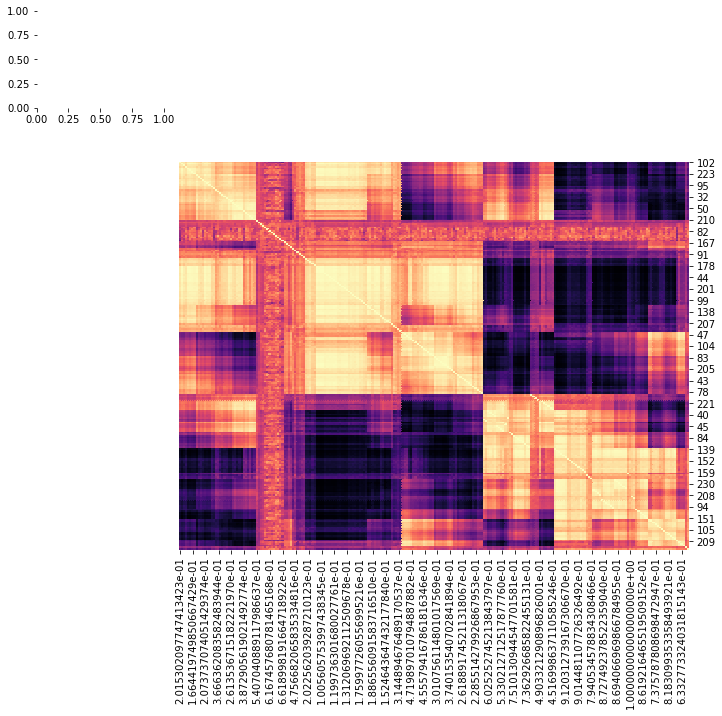

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read three different matrix files with header row and no row label column
file1 = 'similarity_matrices_mfMRI/similarity_node_1.csv'
file2 = 'similarity_matrices_mfMRI/similarity_node_2.csv'
file3 = 'similarity_matrices_mfMRI/similarity_node_3.csv'

# Read CSV files
distance_matrix_df1 = pd.read_csv(file1)
distance_matrix_df2 = pd.read_csv(file2)
distance_matrix_df3 = pd.read_csv(file3)

# Define the minimum and maximum values
min_value = 1
max_value = 238

def plot_roi(heatmap, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Original heatmap
    sns.heatmap(heatmap, ax=axes[0], annot=False, cmap='magma', cbar=True, square=True, linewidths=0, vmin=heatmap.values.min(), vmax=heatmap.values.max())
    axes[0].set_xticks([0, len(heatmap.columns) - 1])
    axes[0].set_yticks([0, len(heatmap) - 1])
    axes[0].set_xticklabels([min_value, max_value])
    axes[0].set_yticklabels([min_value, max_value])
    axes[0].set_title(f'{title} - Original Heatmap')

    # Sorted heatmap
    sns.heatmap(heatmap, ax=axes[1], annot=False, cmap='magma', cbar=False, square=True, linewidths=0, vmin=heatmap.values.min(), vmax=heatmap.values.max())
    clustergrid = sns.clustermap(heatmap, annot=False, cmap='magma', cbar=False, square=True, linewidths=0, row_cluster=True, col_cluster=True, vmin=heatmap.values.min(), vmax=heatmap.values.max())
    axes[1].set_title(f'{title} - Sorted Heatmap')
    # Remove the dendrograms and reorder the rows and columns
    clustergrid.ax_row_dendrogram.set_visible(False)
    clustergrid.ax_col_dendrogram.set_visible(False)
    reordered_data = heatmap.iloc[clustergrid.dendrogram_row.reordered_ind, clustergrid.dendrogram_col.reordered_ind]
    sns.heatmap(reordered_data, ax=axes[1], annot=False, cmap='magma', cbar=False, square=True, linewidths=0, vmin=heatmap.values.min(), vmax=heatmap.values.max())
    axes[1].set_xticks([])
    axes[1].set_yticks([])

    # Histogram
    sns.histplot(heatmap.values.flatten(), ax=axes[2], color='blue')
    axes[2].set_title(f'{title} - Histogram')

    plt.tight_layout()

    return fig

# Plot for ROI 1
roi1_fig = plot_roi(distance_matrix_df1, 'ROI 1')
plt.show()

# Plot for ROI 2
roi2_fig = plot_roi(distance_matrix_df2, 'ROI 2')
plt.show()

# Plot for ROI 3
roi3_fig = plot_roi(distance_matrix_df3, 'ROI 3')
plt.show()
